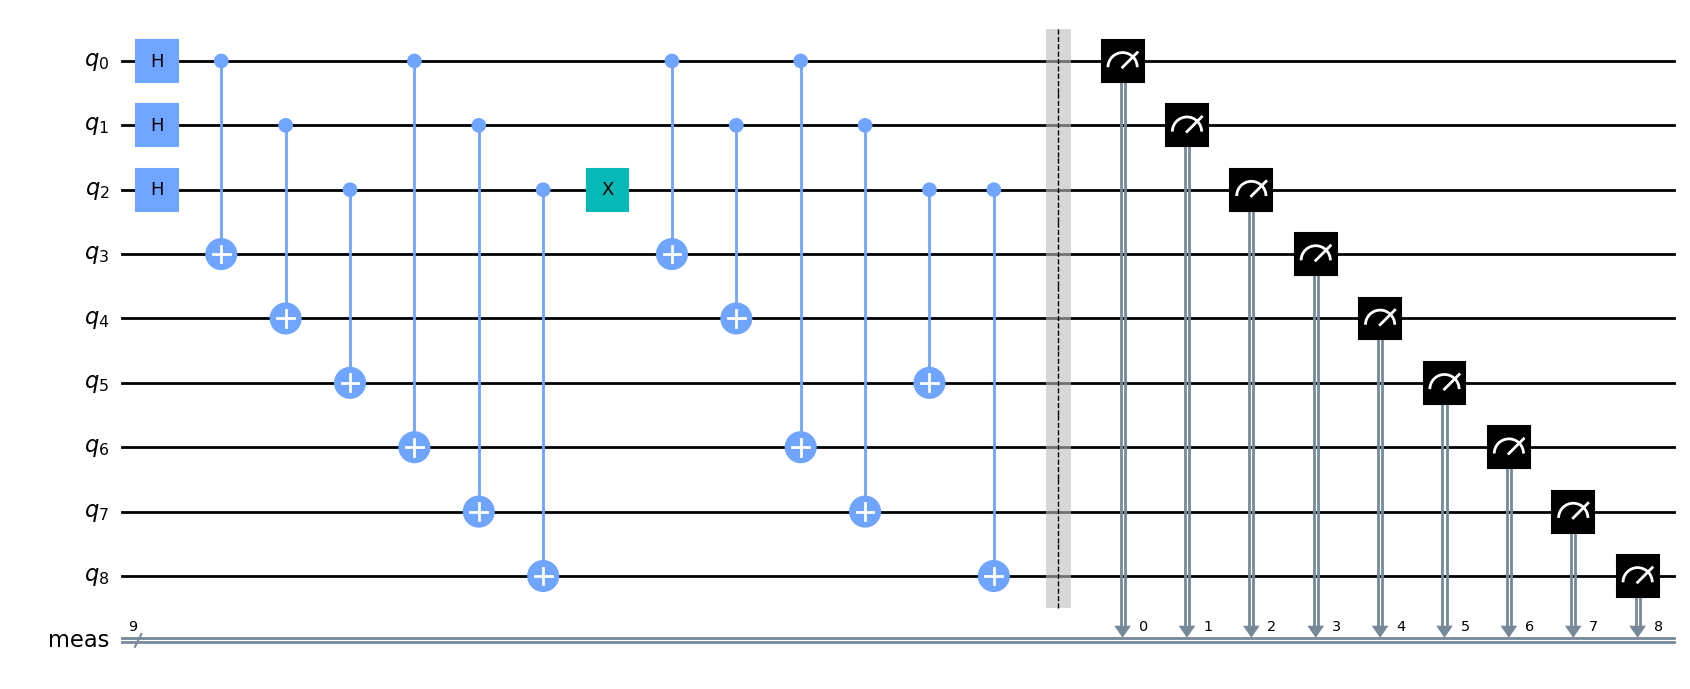

In [1]:

#-------------------------------------------------------------------------
# Simple Error Correction Code
# Chapter 2 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
# This is a simplified version of Shor’s error correction code.
# The objective is to protect a logical qubit against single-qubit errors.
# Ech logical qubit is encoded into 3 physical qubits.
# The code ensures that a single error can be detected and corrected by majority voting.
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation required
#-------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

# Define a circuit for Shor's code - Requires 9 qubits
qc = QuantumCircuit(9)

# Each logical qubit is encoded into 3 physical qubits
# Each qubit group
# Encode a logical |0⟩ state
for i in range(3):
    qc.h(i)
    qc.cx(i, i + 3) # qc.cx is a CNOT Gate
    qc.cx(i, i + 6)

# A deliberate X-error (bit flip) is introduced on qubit 2 
qc.x(2)

# Decode and measure
# Decoding reverses the encoding process. 
# If an error occurred, the redundancy allows the error to be detected during this step.
for i in range(3):
    qc.cx(i, i + 3)
    qc.cx(i, i + 6)
qc.measure_all()

# Display circuit
#print(qc)

# Draw the circuit
display(circuit_drawer(qc, output='mpl', style="iqp"))

Syndrome Results: {'000': 1}


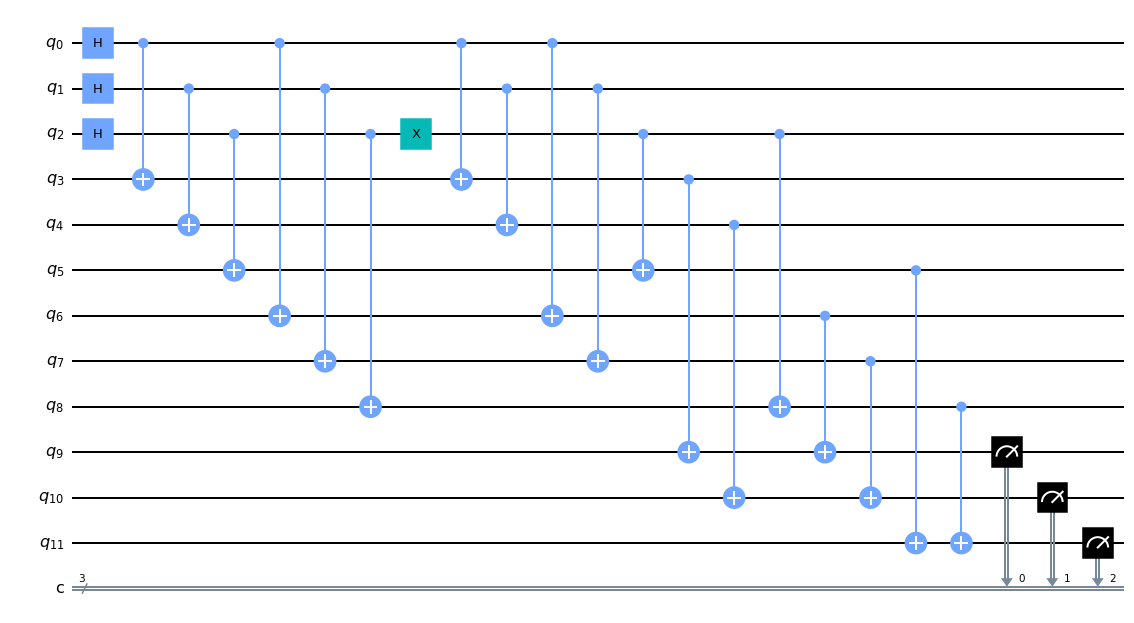

In [5]:
#-------------------------------------------------------------------------
# Simple Error Detection Code
# Chapter 2 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence: MIT - Citation required
#-------------------------------------------------------------------------

import warnings
warnings.filterwarnings('ignore')

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import circuit_drawer, plot_histogram

# Define a circuit for Shor's code with error detection
qc = QuantumCircuit(9 + 3, 3)  # 9 data qubits, 3 syndrome qubits, 3 classical bits

# ------------------------------
# 1. Encode the logical |0> state
# ------------------------------
for i in range(3):
    qc.h(i)  # Create superposition
    qc.cx(i, i + 3)  # Entangle qubit i with i+3
    qc.cx(i, i + 6)  # Entangle qubit i with i+6

# ------------------------------
# 2. Introduce an error on one qubit
# ------------------------------
qc.x(2)  # Simulate a bit-flip error on qubit 2

# ------------------------------
# 3. Decode and add parity checks
# ------------------------------
for i in range(3):
    qc.cx(i, i + 3)  # Reverse entanglement between i and i+3
    qc.cx(i, i + 6)  # Reverse entanglement between i and i+6

# Parity checks for error detection
for i in range(3):
    qc.cx(i + 3, 9 + i)  # Check parity between i+3 and i+6
    qc.cx(i + 6, 9 + i)

# Measure syndrome qubits to detect errors
qc.measure(range(9, 12), range(3))

# ------------------------------
# Simulate and output results
# ------------------------------
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1).result()
syndrome = result.get_counts()

print("Syndrome Results:", syndrome)

# Display the circuit
display(circuit_drawer(qc, output='mpl', style="iqp"))
